<a href="https://colab.research.google.com/github/Alejandro-RL/Atividade_2.2/blob/main/Parte%202/C%C3%B3pia_de_PP2_2_2_Proposic%CC%A7a%CC%83o_e_Avaliac%CC%A7a%CC%83o_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Adan Thierry Souza dos Santos - 1915080050
* Alejandro da Rocha Loureiro - 1915080001
* Fernando Araújo Alves Filho - 1915080063
* Victor Brasil de Pina - 1915080079


## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

### Import

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score,f1_score,precision_score,recall_score

### Dataset

In [2]:
!wget https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv

--2021-11-29 19:06:34--  https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2j9euhvkl1njfzh/covtype.csv [following]
--2021-11-29 19:06:35--  https://www.dropbox.com/s/raw/2j9euhvkl1njfzh/covtype.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc126855e7355d9a3b02365245a0.dl.dropboxusercontent.com/cd/0/inline/Ba5BqzsLHTooituHDO3HvlMwOirkO4Lm9NfW394rA0OodwQ6_Y4tyubsE3MMrST3Q1wgCW2pe-7Z469dUPnKpYYjy-o_gAfsu-pe21ZSrkM86SIJA82sD5QSrlJWX7r5CVdeYgmxKmnLBC8dZH7w6XUk/file# [following]
--2021-11-29 19:06:35--  https://uc126855e7355d9a3b02365245a0.dl.dropboxusercontent.com/cd/0/inline/Ba5BqzsLHTooituHDO3HvlMwOirkO4Lm9NfW394rA0OodwQ6_Y4tyubsE3MMrST3Q1wgCW2pe-7Z469dUPnKpYYjy-o_g

## Questão 1

In [3]:
#1
df = pd.read_csv('/content/covtype.csv')

##Questão 2 e 3
### Definindo atributos preditores e atributo alvo

In [4]:
#2 e 3
X = df[df.columns[0:10]]
y = df[df.columns[-1]]

## Questão 4
### Train/Test Split 
70/30

In [5]:
#4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=42, shuffle=True)

## Questão 5
### Padronização

In [6]:
#5
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [7]:
X_train_std

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
110220,-1.213285,1.521970,-1.215756,-0.985653,-0.709902,-0.962484,-0.229567,0.541278,0.614032,-0.199579
363425,0.666947,-0.684312,-0.413945,-0.444373,0.182714,-0.831053,0.817019,-0.166989,-0.667745,-0.668463
111410,0.178158,1.039625,-0.280310,1.447756,-0.229263,2.016207,-0.864994,0.996592,1.346476,-0.496589
552313,-0.289224,0.512618,1.590582,-0.952706,-0.194931,0.389659,-0.939750,1.502497,1.241841,-0.500358
107881,0.745438,-1.068401,-1.082121,-0.364357,-0.349423,0.473647,0.293726,0.136554,-0.013777,1.807877
...,...,...,...,...,...,...,...,...,...,...
110268,0.795388,-0.764703,-0.146675,0.435797,-0.109103,0.411458,0.817019,-0.470532,-0.877015,1.774708
259178,0.759710,0.003476,1.991488,2.102000,4.199487,-0.766940,0.929153,0.237735,-1.164761,0.644713
365838,0.691921,1.173609,0.387866,0.308713,-0.091937,-0.674617,-1.537799,0.693049,1.634222,0.047678
131932,0.377955,1.718481,0.922406,-0.684419,-0.469582,1.522537,-1.313531,-1.077617,0.430921,-1.023518


### Modelo

In [8]:
#5
rede = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=True)
rede.fit(X_train_std,y_train)

Iteration 1, loss = 1.03787469
Iteration 2, loss = 0.72061741
Iteration 3, loss = 0.69740446
Iteration 4, loss = 0.68622966
Iteration 5, loss = 0.67688959
Iteration 6, loss = 0.67248911
Iteration 7, loss = 0.66985744
Iteration 8, loss = 0.66780421
Iteration 9, loss = 0.66585340
Iteration 10, loss = 0.66433207
Iteration 11, loss = 0.66307800
Iteration 12, loss = 0.66201041
Iteration 13, loss = 0.66114474
Iteration 14, loss = 0.66045728
Iteration 15, loss = 0.65982182
Iteration 16, loss = 0.65949092
Iteration 17, loss = 0.65908127
Iteration 18, loss = 0.65859571
Iteration 19, loss = 0.65822306
Iteration 20, loss = 0.65792816
Iteration 21, loss = 0.65750696
Iteration 22, loss = 0.65714938
Iteration 23, loss = 0.65677542
Iteration 24, loss = 0.65652042
Iteration 25, loss = 0.65605015
Iteration 26, loss = 0.65570796
Iteration 27, loss = 0.65540778
Iteration 28, loss = 0.65506212
Iteration 29, loss = 0.65478162
Iteration 30, loss = 0.65442631
Iteration 31, loss = 0.65419503
Iteration 32, los

MLPClassifier(hidden_layer_sizes=10, max_iter=300, verbose=True)

## Questão 6 - Validação da questão 5

In [9]:
## Essa função vai ser reutilizada posteriormente
def validation(rede, X_test_std,y_test, p = True):
  y_pred = rede.predict(X_test_std)
  cmatrix = confusion_matrix(y_test,y_pred)
  
  #6.2 Acurácia
  acc = balanced_accuracy_score(y_test,y_pred,adjusted=False)
  

  #6.4 Precisão
  pre = precision_score(y_test,y_pred,average='weighted')
  

  #6.5 Revocação 
  rev = recall_score(y_test,y_pred,average='weighted')
  

  #6.3 F-Score
  f1 = f1_score(y_test,y_pred,average='weighted')
  

  if (p):
    print("Matriz de confusão:\n")
    print(cmatrix)
    print("\nAcurácia: ",acc)
    print("\nPrecisão: ",pre)
    print("\nRevocação: ",rev)
    print("\nF-Score: ",f1)
  return cmatrix, acc, pre, rev, f1

In [28]:
validation(rede,X_test_std, y_test)
!

Matriz de confusão:

[[44831 18020     1     0    23     7   996]
 [15617 67603   793     0   111   443    55]
 [    0  1988  7053   190     0  1500     0]
 [    0     8   378   265     0   162     0]
 [    7  2551    14     0   232    12     0]
 [    0  1554  1857    86     1  1741     0]
 [ 3248    28     0     0     0     0  2929]]

Acurácia:  0.4815218032451142

Precisão:  0.7108563852125064

Revocação:  0.7151528364237195

F-Score:  0.7075684388394253


## Questão 7- Repetir a mesma rede anterior 100x

### Train/Test split

In [ ]:
from IPython.display import clear_output
def acompanha(x):
  saida = '['
  for i in range(x):
    clear_output(wait=True)
    saida+=':'
  for k in range(100 - x):
    saida += ' '
  saida+=']'
  saida+= ' '+ str(x+1) + '%'
  print(saida)

In [ ]:
k = 0.3 ## Conjunto de teste 
z = 0.7 ## Conjunto de treino

## Nós vamos mudar cerca de 0,2% para mais e para menos em cada iteração 
## K vai incrementar (ou seja, o conjunto de testes vai aumentar)
## z vai decrementar (O conjunto de treino vai diminuir)

## Como são 100 iterações, o tamanho final do conjunto de testes e treino vai ser
## igual a 0.5 cada
resultados = []
for x in range(100):
  #7 e 7.1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= k,train_size= z,random_state=25, shuffle=True)
  
  ## Padronização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
  
  ### Modelo
  rede1 = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=False)
  rede1.fit(X_train_std,y_train)

  k+= 0.002
  z-= 0.002
  resultados.append(validation(rede1, X_test, y_test, p = False))
  acompanha(x)

[::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: ] 99%


In [ ]:
print(f"tamanho final do conjunto de treino: {k}\nTamanho final do conjunto de"+
      f"teste: {z}")

tamanho final do conjunto de treino: 0.5000000000000001
Tamanho final do conjunto deteste: 0.4999999999999998


In [ ]:
import pickle
def salva_lista(lista, nome):
  
  with open(nome+'.data', 'wb') as filehandle:
      # store the data as binary data stream
      pickle.dump(lista, filehandle)

def ler_lista(path):
  with open(path, 'rb') as filehandle:
    lista = pickle.load(filehandle)
  return lista



In [ ]:
salva_lista(resultados, 'resultados_')
resultados_1 = ler_lista('/content/resultados_.data')


### 7.2 Média e Desvio Padrão  da acurácia e F-score

#### Media

In [ ]:
soma_acc = 0
soma_f1score = 0
for resultado in resultados:
  soma_acc+= resultado[1]
  soma_f1score+= resultado[4]
media_acc = soma_acc/len(resultados)
media_f1 = soma_f1score/len(resultados)
print(f"medias:\nAcurácia: {media_acc}\nf1 score:{media_f1}")

medisa:
Acurácia: 0.1460263929778969
f1 score:0.02253955338196134


#### Desvio padrão

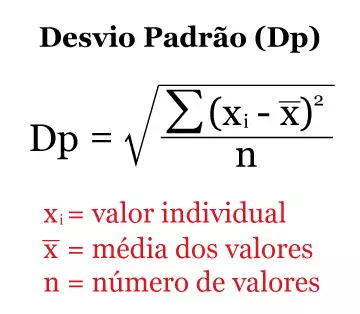

In [ ]:
somatorio_acc = 0
somatorio_f1 = 0
for resultado in resultados:
  somatorio_acc += (resultado[1] - media_acc)**(2)
  somatorio_f1 += (resultado[4] - media_f1)**(2)

dp_acc = (somatorio_acc/len(resultado))**(1/2)
dp_f1 = (somatorio_f1/len(resultado))**(1/2)
print(f"desvio padrao:\nAcurácia: {dp_acc}\nf1 score:{dp_f1}")

desvio padrao:
Acurácia: 0.026902277496345543
f1 score:0.16580714390450854


## Questão 8 - utilizando otiizador SGD

In [ ]:
#8
k = 0.3 ## Conjunto de teste 
z = 0.7 ## Conjunto de treino

## Nós vamos mudar cerca de 0,2% para mais e para menos em cada iteração 
## K vai incrementar (ou seja, o conjunto de testes vai aumentar)
## z vai decrementar (O conjunto de treino vai diminuir)

## Como são 100 iterações, o tamanho final do conjunto de testes e treino vai ser
## igual a 0.5 cada
resultados = []
for x in range(50):
  #7 e 7.1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= k,train_size= z,random_state=25, shuffle=True)
  
  ## Padronização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
  
  ### Modelo
  rede1 = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=False, solver = 'sgd')
  rede1.fit(X_train_std,y_train)

  k+= 0.002
  z-= 0.002
  resultados.append(validation(rede1, X_test, y_test, p = False))
  acompanha(x)



In [ ]:
salva_lista(resultados, 'resultados2_')

TypeError: ignored

In [ ]:
resultados

[(array([[    0,     0,     0,     0,     0,     0, 63514],
         [    0,     0,     0,     0,     0,     0, 85045],
         [    0,     0,     0,     0,     0,     0, 10747],
         [    0,     0,     0,     0,     0,     0,   804],
         [    0,     0,     0,     0,     0,     0,  2844],
         [    0,     0,     0,     0,     0,     0,  5235],
         [    0,     0,     0,     0,     0,     0,  6115]]),
  0.14285714285714285,
  0.0012307737231831354,
  0.03508238479897191,
  0.0023781174160782763),
 (array([[    0,     0,     0,     0,     0,     0, 63923],
         [    0,     0,     0,     0,     0,     0, 85627],
         [    0,     0,     0,     0,     0,     0, 10813],
         [    0,     0,     0,     0,     0,     0,   809],
         [    0,     0,     0,     0,     0,     0,  2861],
         [    0,     0,     0,     0,     0,     0,  5275],
         [    0,     0,     0,     0,     0,     0,  6158]]),
  0.14285714285714285,
  0.001231667317439271,
  0.03509511

In [ ]:
#8.1
y_pred = rede2.predict(X_test_std)
# Matriz de confusão para o conjunto de teste
cmatrix = confusion_matrix(y_test,y_pred)
print("Matriz de confusão:\n")
print(cmatrix)

#Acurácia
acc = balanced_accuracy_score(y_test,y_pred,adjusted=False)
print("\nAcurácia: ",acc)

#Precisão
pre = precision_score(y_test,y_pred,average='weighted')
print("\nPrecisão: ",pre)

#Revocação 
rev = recall_score(y_test,y_pred,average='weighted')
print("\nRevocação: ",rev)

#F-Score
f1 = f1_score(y_test,y_pred,average='weighted')
print("\nF-Score: ",f1)

In [ ]:
#Houve influência da escolha do otimizador no desempenho da rede?

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [36]:
#1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=39, shuffle=True)

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [ ]:

#Uma ou duas camadas ocultas
#solver Adam ou SGD
# épocas: 100, 150 ou 200
redes = [[] for i in range(10)]
redes[0] = MLPClassifier(hidden_layer_sizes=(10),activation='tanh',max_iter=100,solver="adam").fit(X_train_std,y_train)
redes[1] = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=150,solver="sgd").fit(X_train_std,y_train)
redes[2] = MLPClassifier(hidden_layer_sizes=(10),activation='logistic',max_iter=200,solver="adam").fit(X_train_std,y_train)
redes[3] = MLPClassifier(hidden_layer_sizes=(10,15),activation='identity',max_iter=100,solver="adam").fit(X_train_std,y_train)
redes[4] = MLPClassifier(hidden_layer_sizes=(10,15),activation='relu',max_iter=150,solver="adam").fit(X_train_std,y_train)
redes[5] = MLPClassifier(hidden_layer_sizes=(10,15),activation='tanh',max_iter=200,solver="adam").fit(X_train_std,y_train)
redes[6] = MLPClassifier(hidden_layer_sizes=(20),activation='relu',max_iter=100,solver="adam").fit(X_train_std,y_train)
redes[7] = MLPClassifier(hidden_layer_sizes=(20),activation='logistic',max_iter=150,solver="adam").fit(X_train_std,y_train)
redes[8] = MLPClassifier(hidden_layer_sizes=(20),activation='identity',max_iter=200,solver="adam").fit(X_train_std,y_train)
redes[9] = MLPClassifier(hidden_layer_sizes=(30,40),activation='logistic',max_iter=200,solver="adam").fit(X_train_std,y_train)

In [42]:
for i in range(len(redes)):
  print("Rede número :",i,"---------------------------------------------")
  validation(redes[i], X_test_std,y_test, p = True)

Rede número : 0 ---------------------------------------------
Matriz de confusão:

[[45323 16824    32     0    17    57  1625]
 [15842 67364  1023     1    58   310    24]
 [    0  2068  7951    96     0   616     0]
 [    0     5   495   275     0    38     0]
 [   26  2548    17     0   210    15     0]
 [    0  1574  2692    37     0   936     0]
 [ 3277    24     0     0     0     0  2904]]

Acurácia:  0.4722880864219272

Precisão:  0.7114898206840872

Revocação:  0.7169256012483937

F-Score:  0.7065120601703246
Rede número : 1 ---------------------------------------------
Matriz de confusão:

[[44433 18385     1     0     6    17  1036]
 [15035 68366   862     0    71   266    22]
 [    0  2186  7378   184     0   983     0]
 [    0     2   465   209     0   137     0]
 [   21  2545    11     0   239     0     0]
 [    0  1667  2401    46     0  1125     0]
 [ 3513    26     0     0     0     0  2666]]

Acurácia:  0.45390927043365475

Precisão:  0.708827447041727

Revocação:  0.7

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão:

[[44914 17784     5     0     0     2  1173]
 [17016 65944  1235     4     0   394    29]
 [    0  1943  7531   352     0   905     0]
 [    0     5   400   354     0    54     0]
 [    2  2805     9     0     0     0     0]
 [    0  1427  2657   107     0  1048     0]
 [ 4344    82     0     0     0     0  1779]]

Acurácia:  0.44376630855087873

Precisão:  0.6796559444541758

Revocação:  0.697459610794933

F-Score:  0.6847723510511912
Rede número : 4 ---------------------------------------------
Matriz de confusão:

[[46919 16478     8     0     0     8   465]
 [13555 69456  1205     2   109   248    47]
 [    0  1669  8517   114     0   431     0]
 [    0    10   427   344     0    32     0]
 [   19  2370    54     0   372     1     0]
 [    0  1564  2690    84     0   901     0]
 [ 3305    23     0     0     0     0  2877]]

Acurácia:  0.5056907265474893

Precisão:  0.7407729938741028

Revocação:  0.7423008077841013

F-Score:  0.7317426563655444
Rede número : 5 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão:

[[45400 17547     1     0     0     1   929]
 [17202 66306   852     0     0   246    16]
 [    0  2354  7166   142     0  1069     0]
 [    0     8   502   194     0   109     0]
 [    2  2810     4     0     0     0     0]
 [    0  1734  2478    29     0   998     0]
 [ 4787    91     0     0     0     0  1327]]

Acurácia:  0.40072091438108554

Precisão:  0.6769603029887319

Revocação:  0.6964326693592804

F-Score:  0.6815058223089657
Rede número : 9 ---------------------------------------------
Matriz de confusão:

[[50914 12185     0     0    55    19   705]
 [10057 73286   739     1   200   241    98]
 [    1  1280  8625    86     2   737     0]
 [    0     1   248   512     0    52     0]
 [  157  1710    29     0   900    20     0]
 [   40   979  1742    35     6  2437     0]
 [ 1674   120     0     0     0     0  4411]]

Acurácia:  0.65603547858613

Precisão:  0.8080981744373376

Revocação:  0.809419175693042

F-Score:  0.8058993483610883


'\n  print("Rede número :",i,"---------------------------------------------")\n\n  y_pred = redes[i].predict(X_test_std)\n  # Matriz de confusão para o conjunto de teste\n  cmatrix = confusion_matrix(y_test,y_pred)\n  print("\nMatriz de confusão:\n")\n  print(cmatrix)\n\n  #Acurácia\n  acc = balanced_accuracy_score(y_test,y_pred,adjusted=False)\n  print("\nAcurácia: ",acc)\n\n  #Precisão\n  pre = precision_score(y_test,y_pred,average=\'weighted\',zero_division=0)\n  print("\nPrecisão: ",pre)\n\n  #Revocação \n  rev = recall_score(y_test,y_pred,average=\'weighted\')\n  print("\nRevocação: ",rev)\n\n  #F-Score\n  f1 = f1_score(y_test,y_pred,average=\'weighted\')\n  print("\nF-Score: ",f1)\n\n'

In [ ]:
#As melhores até agora:  Rede[9],Rede[7], Rede[6]

In [ ]:
#2 Avaliar cada rede 100 vezes

In [ ]:
#3
#3.1 Top-3 melhores redes no tocante à F-Score e Acurácia
#3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn 

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?